In [5]:
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

In [6]:
#fara a para quando todas as soluçoes forem encontradas
def cond_de_Parada(A, i):
    if i == 0: return 1
    else:
        x = []
        for j in range(len(A[i])): x.append(abs(A[i][j] - A[i-1][j]))
        G_k = max(x)
        Gr_k = G_k/max(A[i])
        return Gr_k

In [16]:
#Metodo de jacobi
#Resolve o membro esquerdo da expressão Dx=b-Rx, em ordem a (x) ao usar o método resultante da iteração anterior no membro direito.
def M_jacobi(A,b,N,x):
                                                                                                                                                             
    if x is None:  # Cria um palpite inicial, se necessário
        x = zeros(len(A[0]))

                                                                                                                                                 
                                                                                                                                                                      
    D = diag(A) # Crie um vetor dos elementos diagonais de A  
    R = A - diagflat(D) # e subtrai-os de A    

                                                                                                                                                                            
    for i in range(N):# faz interações N vezes    
        x = (b - dot(R,x)) / D
    return x

a=np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])
b=np.array([6,25,-11,15])
c=array([0,0,0,0])



print( "A:")
print(a)

print ("\n\nb:")
print(b)
print("\n\nResultado para 4 interações \n\n")

print ("x:")
print(M_jacobi(a,b,4,c))

A:
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]


b:
[  6  25 -11  15]


Resultado para 4 interações 


x:
[ 1.01519876  1.95369576 -0.96810863  0.97384272]


In [11]:
#Método de GaussSeidel para o sistema

def M_GaussSeidel(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(cond_de_Parada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            E = 0
            for j in range(A.shape[0]):
                if i != j:
                    if j < len(y):
                        E = E + A[i][j]*y[j]
                    else:
                        E = E + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - E))
        X.append(y)
        k = k+1
    return X

A = np.array([[5,1,1],[3,4,1],[3,3,6]])
f = np.array([[5],[6],[0]])

X = M_GaussSeidel(A,f,0.05)
print("Interações para o Metodo de GaussSeidel para o sistema", a, "\n\n",b, "\n\n")

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Interações para o Metodo de GaussSeidel para o sistema [[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]] 

 [[  6]
 [ 25]
 [-11]
 [ 15]] 


Iteração 0: [0, 0, 0].
Iteração 1: [1.0, 0.75, -0.875].
Iteração 2: [1.0250000000000001, 0.95, -0.9874999999999999].
Iteração 3: [1.0075, 0.99125, -0.9993749999999999].


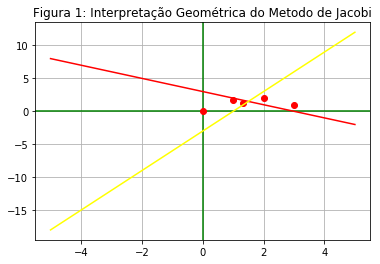

None


In [89]:
#grafico com as interção do Metodo Jacobi
#para o sistema 
# x1 + x2   =3
# x1 - 3*x2 =-3
import matplotlib.pyplot as plt

def interprete_jacobi(I):
    x = np.linspace(-5,5)
    y1 = 3 - x
    y2 = (1/3)*(3 + x)

plt.title("Figura 1: Interpretação Geométrica do Metodo de Jacobi")
plt.axvline(x=0, color='green')
plt.axhline(y=0, color='green')
plt.grid(True)
plt.plot([0,3,2,1,4/3], [0,1,2,5/3,4/3], 'ro')
plt.plot(x, y1, color='red')
plt.plot(x, y2,color='yellow')
g=plt.show()
print(interprete_jacobi(g))

    

In [90]:
a=np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])
b=np.array([6,25,-11,15])

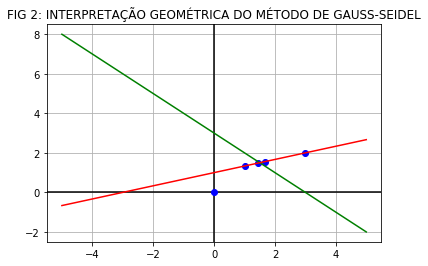

In [94]:
x = np.linspace(-5,5)
x1 = 3 - x
x2 = (1/3)*(3 + x)

plt.title("FIG 2: INTERPRETAÇÃO GEOMÉTRICA DO MÉTODO DE GAUSS-SEIDEL")
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

plt.grid(True)
plt.plot([X[0][0],X[1][0],X[2][0],X[3][0],X[4][0]], [X[0][1],X[1][1],X[2][1],X[3][1],X[4][1]], 'ro', color = 'blue')
plt.plot(x, x1, color = 'green')
plt.plot(x, x2, color = 'red')
plt.show()

In [10]:
import numpy as np

a= np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])
b = np.array([[6],[25],[-11],[15]])

X = M_GaussSeidel(a,b,2e-16)
print("valores da interação do metodo de GaussSeidel para o sistema", "\n\n", a, "\n\n", b,"\n\n")

for i in range(len(X)):
    print("{0}: {1}.".format(i, X[i]))

valores da interação do metodo de GaussSeidel para o sistema 

 [[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]] 

 [[  6]
 [ 25]
 [-11]
 [ 15]] 


0: [0, 0, 0, 0].
1: [0.6000000000000001, 2.3272727272727276, -0.9872727272727273, 0.8788636363636363].
2: [1.0301818181818183, 2.036938016528926, -1.0144561983471074, 0.9843412190082643].
3: [1.006585041322314, 2.003555016904583, -1.0025273846731781, 0.9983509455766341].
4: [1.000860978625094, 2.000298250656547, -1.0003072761017007, 0.9998497464910823].
5: [1.000091280285995, 2.000021342246459, -1.0000311471834449, 0.9999881032596473].
6: [1.0000083636613348, 2.000001173336268, -1.0000027450726756, 0.999999216864815].
7: [1.000000666348162, 2.0000000246073677, -1.0000002091224143, 0.9999999646319353].
8: [1.0000000442852197, 1.9999999946606364, -1.0000000129277868, 1.000000000386288].
9: [1.000000002051621, 1.9999999989059063, -1.0000000004811047, 1.000000000350147].
10: [0.9999999999868117, 1.9999999998595697, -0.99999999997639

In [106]:
A = np.array([[10,2,1],[1,5,1],[2,3,10]])
b = np.array([[7],[-8],[6]])
def M_GaussSeidel(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(condicaoDeParada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[0]):
                if i != j:
                    if j < len(y):
                        sigma = sigma + A[i][j]*y[j]
                    else:
                        sigma = sigma + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - sigma))
        X.append(y)
        k = k+1
    return X
X = metodoDeGaussSeidel(A,b,0.05)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0].
Iteração 1: [0.7000000000000001, -1.74, 0.9820000000000001].
Iteração 2: [0.9498, -1.98636, 1.005948].
Iteração 3: [0.9966771999999999, -2.0005250400000003, 1.000822072].
